# Import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [2]:
house_data_path = "./data/housing_classification_full.csv"
house_df = pd.read_csv(house_data_path)
house_df.set_index("Id", inplace=True)
house_df.head()

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch,Expensive,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,8450,65.0,856,3,0,0,2,0,0,0,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,9600,80.0,1262,3,1,0,2,298,0,0,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,11250,68.0,920,3,1,0,2,0,0,0,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
4,9550,60.0,756,3,1,0,3,0,0,0,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
5,14260,84.0,1145,4,1,0,3,192,0,0,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


# Understanding The Data

In [3]:
house_df.describe()

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch,Expensive,...,KitchenAbvGr,TotRmsAbvGrd,GarageYrBlt,GarageArea,OpenPorchSF,EnclosedPorch,3SsnPorch,MiscVal,MoSold,YrSold
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,70.049958,1057.429452,2.866438,0.613014,2.758904,1.767123,94.244521,15.060959,0.148630,...,1.046575,6.517808,1978.506164,472.980137,46.660274,21.954110,3.409589,43.489041,6.321918,2007.815753
std,9981.264932,24.284752,438.705324,0.815778,0.644666,40.177307,0.747315,125.338794,55.757415,0.355845,...,0.220338,1.625393,24.689725,213.804841,66.256028,61.119149,29.317331,496.123024,2.703626,1.328095
min,1300.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,2.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,7553.500000,59.000000,795.750000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,5.000000,1961.000000,334.500000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,9478.500000,69.000000,991.500000,3.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,...,1.000000,6.000000,1980.000000,480.000000,25.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,11601.500000,80.000000,1298.250000,3.000000,1.000000,0.000000,2.000000,168.000000,0.000000,0.000000,...,1.000000,7.000000,2002.000000,576.000000,68.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,215245.000000,313.000000,6110.000000,8.000000,3.000000,738.000000,4.000000,857.000000,480.000000,1.000000,...,3.000000,14.000000,2010.000000,1418.000000,547.000000,552.000000,508.000000,15500.000000,12.000000,2010.000000


In [4]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotArea        1460 non-null   int64  
 1   LotFrontage    1201 non-null   float64
 2   TotalBsmtSF    1460 non-null   int64  
 3   BedroomAbvGr   1460 non-null   int64  
 4   Fireplaces     1460 non-null   int64  
 5   PoolArea       1460 non-null   int64  
 6   GarageCars     1460 non-null   int64  
 7   WoodDeckSF     1460 non-null   int64  
 8   ScreenPorch    1460 non-null   int64  
 9   Expensive      1460 non-null   int64  
 10  MSZoning       1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Heating        1460 non-null   object 
 13  Street         1460 non-null   object 
 14  CentralAir     1460 non-null   object 
 15  Foundation     1460 non-null   object 
 16  ExterQual      1460 non-null   object 
 17  ExterCond      1460 non-null   object 
 18  BsmtQual     

In [5]:
house_df.select_dtypes(include="number").info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotArea        1460 non-null   int64  
 1   LotFrontage    1201 non-null   float64
 2   TotalBsmtSF    1460 non-null   int64  
 3   BedroomAbvGr   1460 non-null   int64  
 4   Fireplaces     1460 non-null   int64  
 5   PoolArea       1460 non-null   int64  
 6   GarageCars     1460 non-null   int64  
 7   WoodDeckSF     1460 non-null   int64  
 8   ScreenPorch    1460 non-null   int64  
 9   Expensive      1460 non-null   int64  
 10  MSSubClass     1460 non-null   int64  
 11  OverallQual    1460 non-null   int64  
 12  OverallCond    1460 non-null   int64  
 13  YearBuilt      1460 non-null   int64  
 14  YearRemodAdd   1460 non-null   int64  
 15  MasVnrArea     1452 non-null   float64
 16  BsmtFinSF1     1460 non-null   int64  
 17  BsmtFinSF2     1460 non-null   int64  
 18  BsmtUnfSF    

In [6]:
house_df.select_dtypes(exclude="number").info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Condition1     1460 non-null   object
 2   Heating        1460 non-null   object
 3   Street         1460 non-null   object
 4   CentralAir     1460 non-null   object
 5   Foundation     1460 non-null   object
 6   ExterQual      1460 non-null   object
 7   ExterCond      1460 non-null   object
 8   BsmtQual       1423 non-null   object
 9   BsmtCond       1423 non-null   object
 10  BsmtExposure   1422 non-null   object
 11  BsmtFinType1   1423 non-null   object
 12  KitchenQual    1460 non-null   object
 13  FireplaceQu    770 non-null    object
 14  Alley          91 non-null     object
 15  LotShape       1460 non-null   object
 16  LandContour    1460 non-null   object
 17  Utilities      1460 non-null   object
 18  LotConfig      1460 non-null   ob

# Analyzing The Features

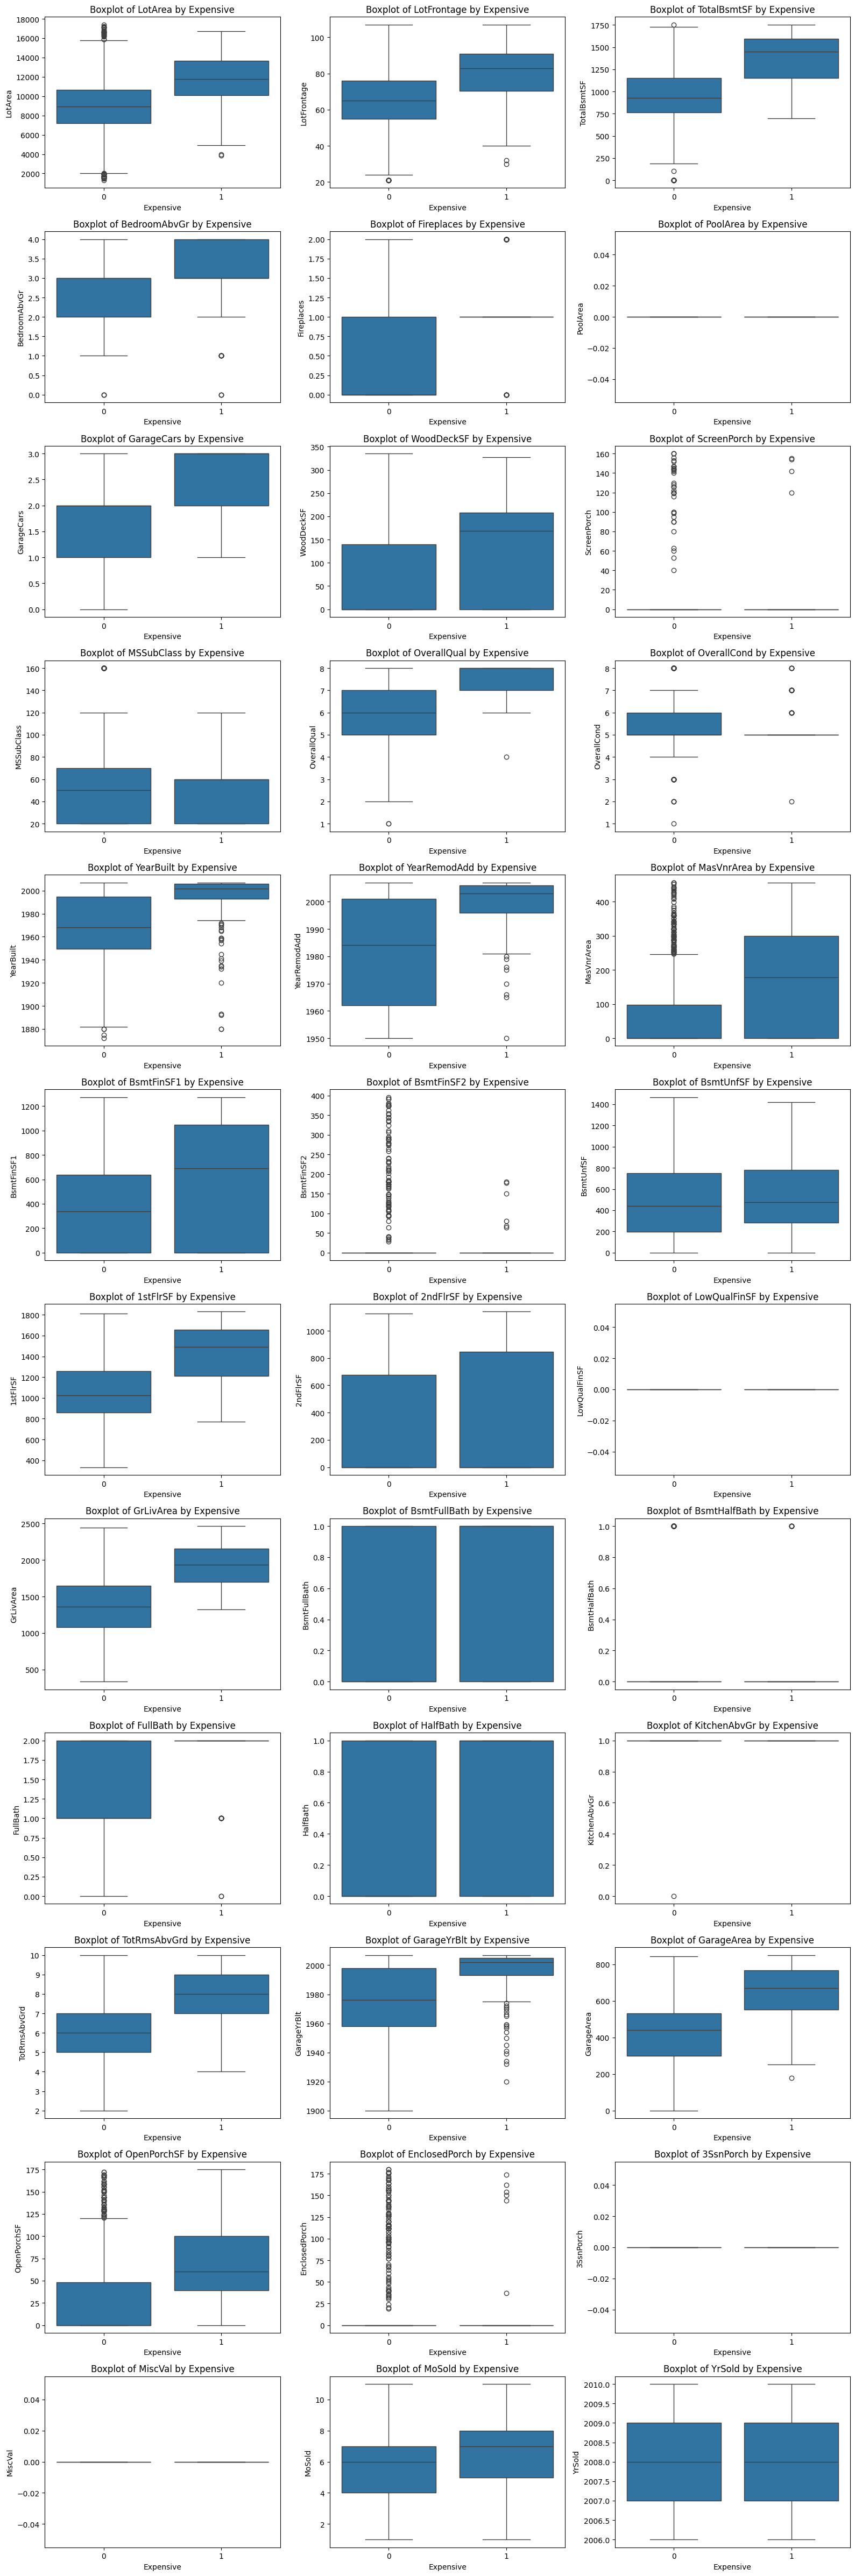

In [7]:
numerical_features = house_df.select_dtypes(include=[np.number]).columns.tolist()
numerical_features.remove("Expensive")

col_num = 3
row_num = int(np.ceil(len(numerical_features) / col_num))
fig, axes = plt.subplots(row_num, col_num, figsize=(16, row_num*4))

for i, feature in enumerate(numerical_features):
    r = i // col_num
    c = i % col_num
    sns.boxplot(x="Expensive", y=feature, data=house_df[house_df[feature] <= house_df[feature].quantile(0.95)], ax=axes[r, c])
    axes[r, c].set_title(f'Boxplot of {feature} by Expensive')

plt.tight_layout()
plt.show()

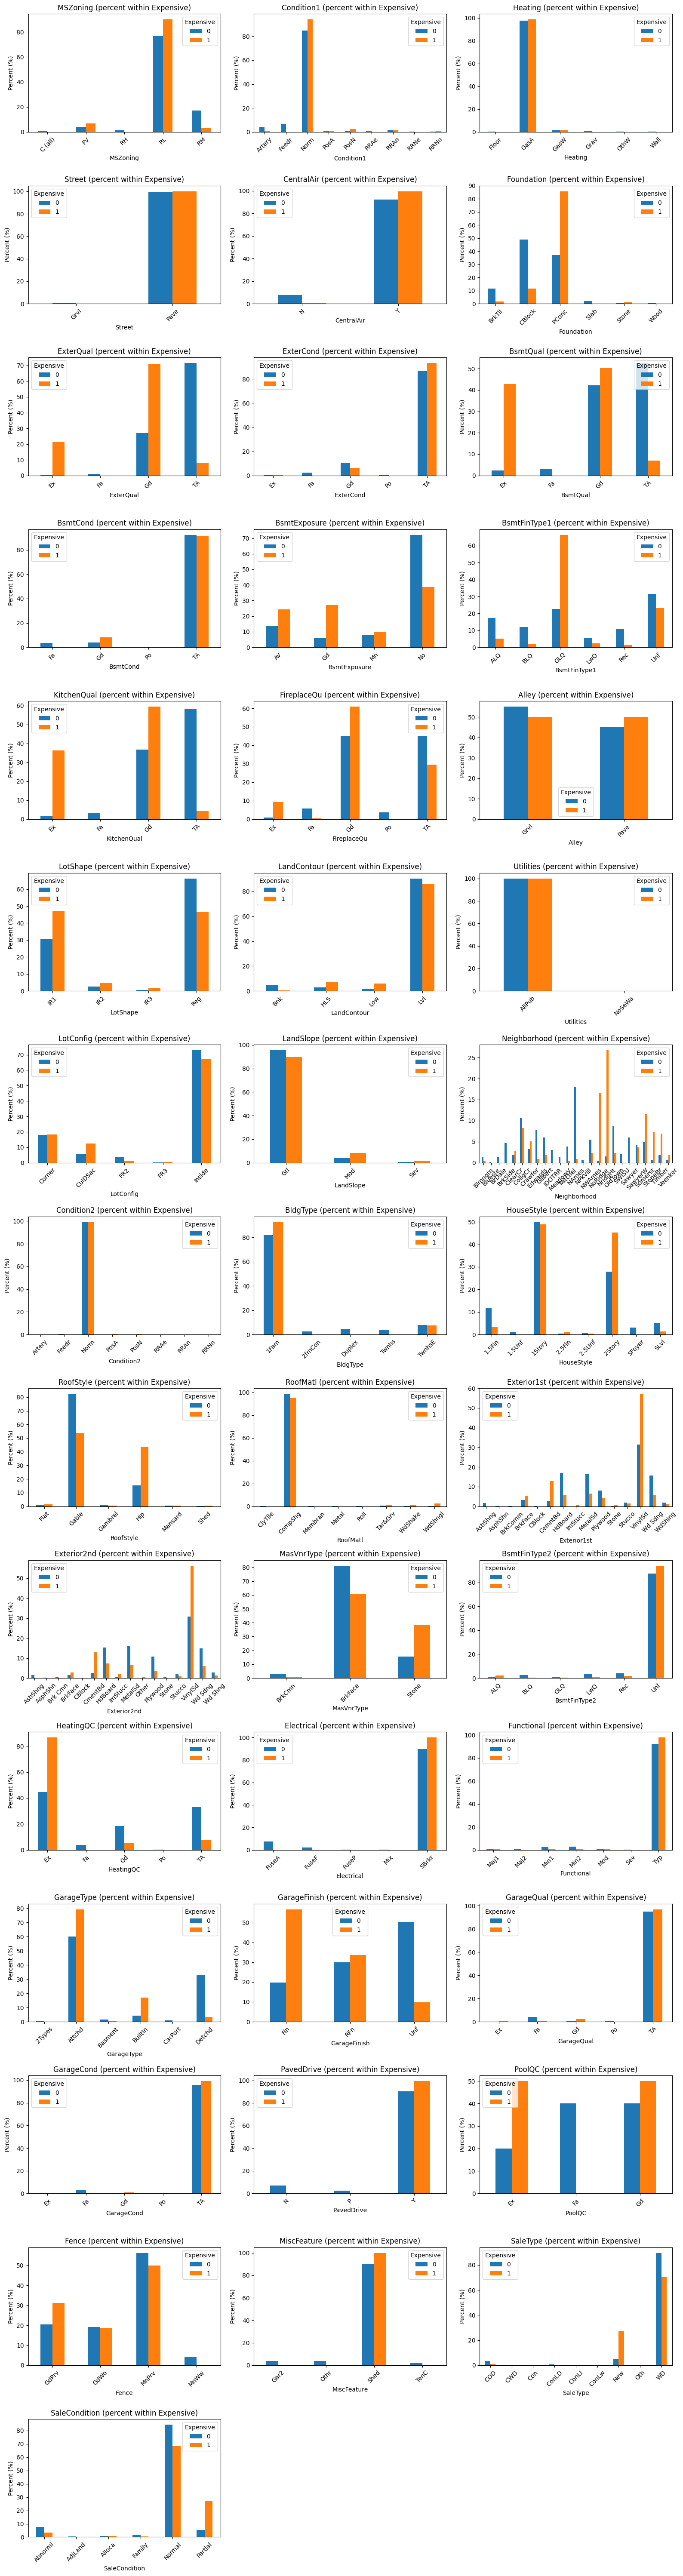

In [8]:
categorical_features = house_df.select_dtypes(include="object").columns.tolist()

col_num = 3
row_num = int(np.ceil(len(categorical_features) / col_num))
fig, axes = plt.subplots(row_num, col_num, figsize=(16, row_num*4))
axes = axes.flatten()

for i, feature in enumerate(categorical_features):
    ct = pd.crosstab(house_df[feature], house_df["Expensive"], normalize="columns") * 100
    ct.plot(kind="bar", ax=axes[i])
    axes[i].set_ylabel("Percent (%)")
    axes[i].set_title(f"{feature} (percent within Expensive)")
    axes[i].tick_params(axis="x", rotation=45)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Train Test Split

In [9]:
from sklearn.model_selection import train_test_split

X = house_df.drop("Expensive", axis=1)
y = house_df["Expensive"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating Pipeline

In [10]:
# Ordinal encoding
quality_order = ['Other','Po','Fa','TA','Gd','Ex']
bsmt_exposure_order = ['No','Mn','Av','Gd'] 

In [11]:
numerical_features = X.select_dtypes(include=[np.number]).columns.tolist()

ordinal_features = [
    'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC',
    'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC',
    'BsmtExposure'
]

categorical_features = X.select_dtypes(exclude=[np.number]).columns.tolist()
categorical_features = [col for col in categorical_features if col not in ordinal_features]

In [12]:
ordinal_mapping = {}

for col in ordinal_features:
    if col == "BsmtExposure":
        ordinal_mapping[col] = bsmt_exposure_order
    else:
        ordinal_mapping[col] = quality_order

In [13]:
def fill_categorical_na(df: pd.DataFrame, threshold=0.01):
    # Undefined category for None values
    if "GarageFinish" in df.columns:
        df["GarageFinish"] = df["GarageFinish"].fillna("Unf")
    if "BsmtFinType1" in df.columns:
        df["BsmtFinType1"] = df["BsmtFinType1"].fillna("Unf")
    if "BsmtFinType2" in df.columns:
        df["BsmtFinType2"] = df["BsmtFinType2"].fillna("Unf")
    if "BsmtExposure" in df.columns:
        df["BsmtExposure"] = df["BsmtExposure"].fillna("No")

    for col in df.select_dtypes(exclude="number"):
        filled = df[col].fillna('None')
        freq = filled.value_counts(normalize=True)
        rare = set(freq[freq < threshold].index.tolist())
        replace_set = rare.union({'None'})   # always map None (original NaN) to 'Other'
        df[col] = filled.replace(list(replace_set), 'Other')

    return df

In [14]:
fill_categorical_na_transformer = FunctionTransformer(fill_categorical_na)

In [15]:
# Pipeline for numerical features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Pipeline for categorical features
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Pipeline for ordinal features
ordinal_transformer = Pipeline(steps=[
    ('ordinal', OrdinalEncoder(categories=[ordinal_mapping[col] for col in ordinal_features]))
])

In [16]:
# Combine all transformers into a ColumnTransformer
cat_preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('ord', ordinal_transformer, ordinal_features)
    ]
)

cat_pipeline = Pipeline(steps=[
    ('fill_na', fill_categorical_na_transformer),
    ('cat_preprocessor', cat_preprocessor)
])

In [17]:

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', cat_pipeline, categorical_features + ordinal_features)
    ])

## Choosing best parameters

In [18]:
def perform_grid_search(model, grid_params, X_train, y_train, cv_folds=5):
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('estimator', model)
    ])

    grid_search = GridSearchCV(pipeline, 
                               param_grid=grid_params, 
                               cv=cv_folds, 
                               n_jobs=-1, 
                               scoring='accuracy',
                               refit=True,
                               verbose=1)
    
    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_

In [19]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Print confusion matrix
    from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()

    return {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1": f1
    }

In [20]:
metrics_df = pd.DataFrame(columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score"])

def add_metrics_to_df(df, model_name, metrics):
    new_row = {
        "Model": model_name,
        "Accuracy": metrics["accuracy"],
        "Precision": metrics["precision"],
        "Recall": metrics["recall"],
        "F1 Score": metrics["f1"]
    }
    return pd.concat([df, pd.DataFrame([new_row])], ignore_index=True)

### Decision Tree

Fitting 5 folds for each of 60 candidates, totalling 300 fits


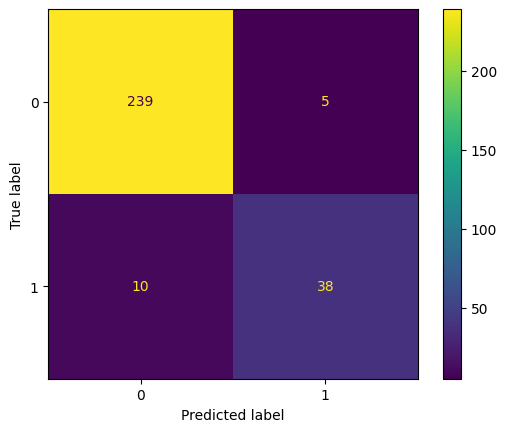

/var/folders/_0/gmt6229n2zd802xr8qz7cf3c0000gn/T/ipykernel_89498/967042864.py:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return pd.concat([df, pd.DataFrame([new_row])], ignore_index=True)


In [21]:
# Model 1: Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_params = {
    "estimator__max_depth": range(3, 15, 2),
    "estimator__min_samples_leaf": range(1, 20, 2)
}

best_dt_model = perform_grid_search(dt_model, dt_params, X_train, y_train)

# Evaluate Decision Tree
dt_metrics = evaluate_model(best_dt_model, X_test, y_test)
metrics_df = add_metrics_to_df(metrics_df, "Decision Tree", dt_metrics)

### RandomForest

Fitting 5 folds for each of 180 candidates, totalling 900 fits


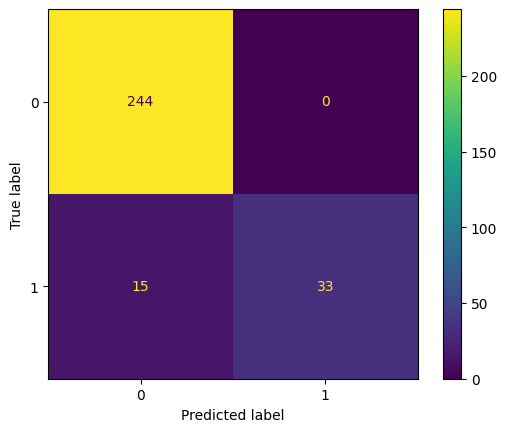

In [22]:
# Model 2: Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_params = {
    "estimator__n_estimators": [50, 100, 150],
    "estimator__max_depth": range(3, 15, 2),
    "estimator__min_samples_leaf": range(1, 20, 2)
}   

best_rf_model = perform_grid_search(rf_model, rf_params, X_train, y_train)

# Evaluate Random Forest
rf_metrics = evaluate_model(best_rf_model, X_test, y_test)
metrics_df = add_metrics_to_df(metrics_df, "Random Forest", rf_metrics)

### Logistic Regression

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The ma

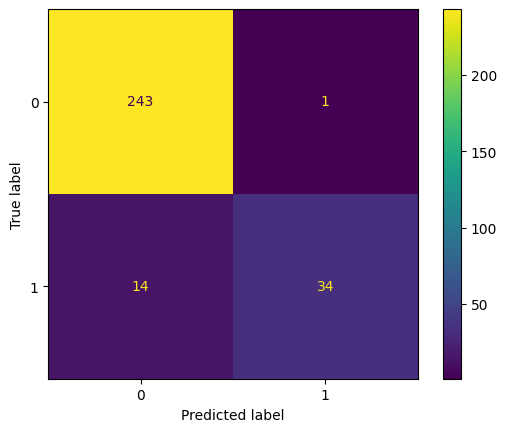

In [23]:
# Model 3: Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg_model = LogisticRegression(random_state=42, max_iter=1000)
logreg_params = {
    "estimator__C": [0.01, 0.1, 1, 10, 100],
    "estimator__penalty": ['l2'],
    "estimator__solver": ['lbfgs', 'saga']
}   
best_logreg_model = perform_grid_search(logreg_model, logreg_params, X_train, y_train)
# Evaluate Logistic Regression
logreg_metrics = evaluate_model(best_logreg_model, X_test, y_test)
metrics_df = add_metrics_to_df(metrics_df, "Logistic Regression", logreg_metrics)

### KNN

Fitting 5 folds for each of 24 candidates, totalling 120 fits


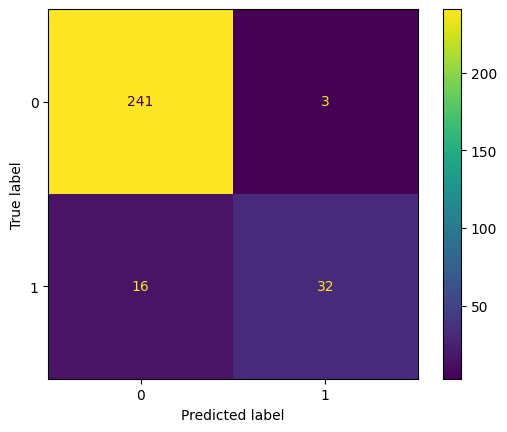

In [24]:
# Model 4: KNN
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_params = {
    "estimator__n_neighbors": range(3, 15, 2),
    "estimator__weights": ["uniform", "distance"],
    "estimator__metric": ["euclidean", "manhattan"]
}

best_knn_model = perform_grid_search(knn_model, knn_params, X_train, y_train)

# Evaluate KNN
knn_metrics = evaluate_model(best_knn_model, X_test, y_test)
metrics_df = add_metrics_to_df(metrics_df, "KNN", knn_metrics)

### Support Vector Machine

Fitting 5 folds for each of 18 candidates, totalling 90 fits


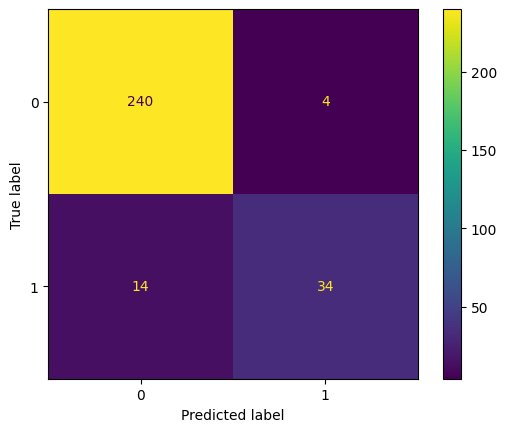

In [25]:
# Model 5: SVM
from sklearn.svm import SVC
svm_model = SVC(random_state=42)
svm_params = {
    "estimator__C": [0.1, 1, 10],
    "estimator__kernel": ["linear", "rbf", "poly"],
    "estimator__gamma": ["scale", "auto"]
}

best_svm_model = perform_grid_search(svm_model, svm_params, X_train, y_train)

# Evaluate SVM
svm_metrics = evaluate_model(best_svm_model, X_test, y_test)
metrics_df = add_metrics_to_df(metrics_df, "SVM", svm_metrics)

### Results

In [26]:
# See the final metrics dataframe
metrics_df.sort_values(by=["F1 Score", "Recall", "Precision", "Accuracy"], ascending=False, inplace=True) 
metrics_df.reset_index(drop=True, inplace=True)  
metrics_df

,Model,Accuracy,Precision,Recall,F1 Score
0,Decision Tree,0.948630,0.947327,0.948630,0.947479
1,Logistic Regression,0.948630,0.949783,0.948630,0.945274
2,Random Forest,0.948630,0.951605,0.948630,0.944640
3,SVM,0.938356,0.936639,0.938356,0.935391
4,KNN,0.934932,0.933887,0.934932,0.930680


# Retrain Best Model with all the Data

In [27]:
best_dt_model = best_dt_model.fit(X, y)
best_logreg_model = best_logreg_model.fit(X, y)


# Test Best Model

In [28]:
test_df = pd.read_csv("./data/test_set.csv")
test_df.set_index("Id", inplace=True)
test_df.head()

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch,MSZoning,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,11622,80.0,882.0,2,0,0,1.0,140,120,RH,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1462,14267,81.0,1329.0,3,0,0,1.0,393,0,RL,...,Attchd,Unf,TA,TA,Y,NaN,NaN,Gar2,WD,Normal
1463,13830,74.0,928.0,3,1,0,2.0,212,0,RL,...,Attchd,Fin,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1464,9978,78.0,926.0,3,1,0,2.0,360,0,RL,...,Attchd,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1465,5005,43.0,1280.0,2,0,0,2.0,0,144,RL,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [ ]:
logreg_results = best_logreg_model.predict(test_df)
logreg_results_df = pd.DataFrame(logreg_results, columns=["Expensive"], index=test_df.index)
logreg_results_df.to_csv("./data/results/logreg_results.csv")

In [ ]:
dt_results = best_dt_model.predict(test_df)
dt_results_df = pd.DataFrame(dt_results, columns=["Expensive"], index=test_df.index)
dt_results_df.to_csv("./data/results/dt_results.csv")

In [ ]:
knn_results = best_knn_model.predict(test_df)
knn_results_df = pd.DataFrame(knn_results, columns=["Expensive"], index=test_df.index)
knn_results_df.to_csv("./data/results/knn_results.csv")

In [ ]:
svm_results = best_svm_model.predict(test_df)
svm_results_df = pd.DataFrame(svm_results, columns=["Expensive"], index=test_df.index)
svm_results_df.to_csv("./data/results/svm_results.csv")

In [ ]:
rf_results = best_rf_model.predict(test_df)
rf_results_df = pd.DataFrame(rf_results, columns=["Expensive"], index=test_df.index)
rf_results_df.to_csv("./data/results/rf_results.csv")

# Combine all results

In [ ]:
# Decide on the final predictions based on majority voting
final_results_df = pd.DataFrame(index=test_df.index)
final_results_df["LogReg"] = logreg_results_df["Expensive"]
final_results_df["DT"] = dt_results_df["Expensive"]
final_results_df["KNN"] = knn_results_df["Expensive"]
final_results_df["SVM"] = svm_results_df["Expensive"]
final_results_df["RF"] = rf_results_df["Expensive"]

final_results_df["Expensive"] = final_results_df.mode(axis=1)[0]
final_results_df_final = final_results_df[["Expensive"]]
final_results_df_final.to_csv("./data/results/final_results.csv")